# Project 1

Create code to answer each of the following questions.

> Project Description/Outline: This project will look at the data on the average cost of college in the US by state, type of institution, and year (3-5 year span). Provide a deeper understanding on financials of undergraduate education across the US. Research Questions to Answer:

*Top 5 best schools for funding (most expensive) /year
*Top 5 best schools for funding (most expensive) by state /year
*Top 5 lowest schools for funding (least expensive) /year
*Top 5 lowest schools for funding (least expensive) by state/year
*Looking for schools by state within specific ranges (small, med, large)
*Looking for type of school (private / public-in-state/ public-out-state
*Difference between 2 & 4 year
*What schools offers certain fundings (scholarships, state or federal fundings)
*Did COVID-19 has an effect on the fees
*See the year to year increase

In [1]:
#Importing Dependencies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
#import seaborn as sns
#import plotly.express as px
#import plotly.figure_factory as ff
#import plotly.graph_objects as go

#Styling :
%matplotlib inline
#sns.set_theme(style="dark")
#plt.rcParams['figure.figsize'] = [30, 7] 
#mpl.rcParams['axes.unicode_minus'] = False
#pd.set_option('display.max_columns',None)
#plt.style.use('seaborn-dark-palette')
#plt.style.use('dark_background')
# Import the API key
#from config import geoapify_key

In [2]:
# comment out

In [3]:
#Reading data :
#edu_df = pd.read_csv("4-1-2023---430/Data_4-1-2023---430.csv")
#edu_df
edu_df=pd.read_csv("4-1-2023---430/Data_4-1-2023---430.csv")
edu_df

,Institution,Average net price-students awarded grant or scholarship aid 2020-21,Average net price-students awarded grant or scholarship aid 2019-20,Average net price-students awarded grant or scholarship aid 2018-19,State abbreviation,Sector of institution,Level of institution,Degree-granting status,Institution size category,Institution name,...,Total price for in-state students living off campus (with family) 2016-17,Total price for out-of-state students living off campus (with family) 2016-17,Books and supplies 2021-22,Books and supplies 2020-21,Books and supplies 2019-20,Books and supplies 2018-19,Books and supplies 2017-18,Books and supplies 2016-17,Books and supplies 2015-16,Unnamed
0,Aaniiih Nakoda College,8381.0,7777.0,7472.0,MT,1,1,1,1,Aaniiih Nakoda College,...,8510.0,8510.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,NaN
1,Abilene Christian University-Undergraduate Online,NaN,NaN,NaN,TX,2,1,1,1,Abilene Christian University-Undergraduate Online,...,NaN,NaN,1250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abraham Baldwin Agricultural College,7744.0,8106.0,6823.0,GA,1,1,1,2,Abraham Baldwin Agricultural College,...,7653.0,14260.0,1000.0,900.0,900.0,900.0,900.0,1000.0,1000.0,NaN
3,Academy College,NaN,NaN,NaN,MN,3,1,1,1,Academy College,...,28111.0,28111.0,1685.0,1694.0,1269.0,1452.0,1452.0,1452.0,1452.0,NaN
4,Academy of Interactive Entertainment,NaN,NaN,NaN,LA,5,2,1,1,Academy of Interactive Entertainment,...,20550.0,20550.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,York County Community College,11071.0,8730.0,8456.0,ME,4,2,1,2,York County Community College,...,10760.0,13520.0,1400.0,1400.0,1400.0,1400.0,1400.0,1360.0,1350.0,NaN
1555,York Technical College,6915.0,7870.0,6655.0,SC,4,2,1,2,York Technical College,...,13044.0,17868.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,NaN
1556,Young Americans College of the Performing Arts,NaN,NaN,NaN,CA,5,2,1,1,Young Americans College of the Performing Arts,...,NaN,NaN,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,NaN,NaN
1557,Yuba College,5503.0,7123.0,5825.0,CA,4,2,1,3,Yuba College,...,7219.0,12379.0,1080.0,1080.0,1971.0,1917.0,1854.0,1791.0,1764.0,NaN


In [4]:
edu_clean_df = edu_df.drop(columns=['Institution name', 'Degree-granting status', 'Unnamed'])
edu_clean_df.head(10)


,Institution,Average net price-students awarded grant or scholarship aid 2020-21,Average net price-students awarded grant or scholarship aid 2019-20,Average net price-students awarded grant or scholarship aid 2018-19,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude location of institution,Latitude location of institution,...,Total price for out-of-state students living off campus (not with family) 2016-17,Total price for in-state students living off campus (with family) 2016-17,Total price for out-of-state students living off campus (with family) 2016-17,Books and supplies 2021-22,Books and supplies 2020-21,Books and supplies 2019-20,Books and supplies 2018-19,Books and supplies 2017-18,Books and supplies 2016-17,Books and supplies 2015-16
0,Aaniiih Nakoda College,8381.0,7777.0,7472.0,MT,1,1,1,-108.757816,48.484196,...,17030.0,8510.0,8510.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0
1,Abilene Christian University-Undergraduate Online,NaN,NaN,NaN,TX,2,1,1,-96.826833,32.977065,...,NaN,NaN,NaN,1250.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Abraham Baldwin Agricultural College,7744.0,8106.0,6823.0,GA,1,1,2,-83.528281,31.481889,...,20660.0,7653.0,14260.0,1000.0,900.0,900.0,900.0,900.0,1000.0,1000.0
3,Academy College,NaN,NaN,NaN,MN,3,1,1,-93.299809,44.855722,...,36650.0,28111.0,28111.0,1685.0,1694.0,1269.0,1452.0,1452.0,1452.0,1452.0
4,Academy of Interactive Entertainment,NaN,NaN,NaN,LA,5,2,1,-92.043315,30.220037,...,34580.0,20550.0,20550.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,Advanced Technology Institute,NaN,NaN,NaN,VA,6,2,1,-76.182268,36.841381,...,25610.0,17360.0,17360.0,480.0,480.0,480.0,480.0,480.0,480.0,450.0
6,Agape College of Business and Science,NaN,NaN,NaN,CA,5,2,1,-119.787874,36.741252,...,NaN,NaN,NaN,1163.0,1163.0,1083.0,1083.0,NaN,NaN,NaN
7,Aiken Technical College,4033.0,4362.0,3525.0,SC,4,2,2,-81.841666,33.533833,...,14234.0,8708.0,10634.0,1500.0,1500.0,1500.0,1000.0,1000.0,1000.0,1000.0
8,Aims Community College,8058.0,7189.0,6812.0,CO,4,2,3,-104.763415,40.409559,...,25723.0,8929.0,16597.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0
9,Alamance Community College,17040.0,15521.0,16225.0,NC,4,2,2,-79.357657,36.066683,...,28680.0,13393.0,19273.0,4456.0,2960.0,3114.0,4286.0,2615.0,3929.0,2874.0


In [5]:
edu_clean_df.dtypes

Institution                                                                            object
Average net price-students awarded grant or scholarship aid  2020-21                  float64
Average net price-students awarded grant or scholarship aid  2019-20                  float64
Average net price-students awarded grant or scholarship aid  2018-19                  float64
State abbreviation                                                                     object
Sector of institution                                                                   int64
Level of institution                                                                    int64
Institution size category                                                               int64
Longitude location of institution                                                     float64
Latitude location of institution                                                      float64
Total price for in-state students living on campus 2021-22  

In [6]:
edu_clean_df = edu_clean_df.rename(columns={"Average net price-students awarded grant or scholarship aid  2020-21" : "Avg FAid 2020",
                                     "Average net price-students awarded grant or scholarship aid  2019-20" : "Avg FAid 2019",
                                     "Average net price-students awarded grant or scholarship aid  2018-19" : "Avg FAid 2018",
                                     "Total price for out-of-state students living on campus 2021-22" : "Cost Out-State On Campus 2021",
                                     "Total price for in-state students living on campus 2021-22" : "Cost In-State On Campus 2021",
                                     "Total price for in-state students living off campus (not with family)  2021-22" : "Cost In-State Off Campus Not With Fam 2021",
                                     "Total price for out-of-state students living off campus (not with family)  2021-22" : "Cost Out-State Off Campus Not With Fam 2021",
                                     "Total price for in-state students living off campus (with family)  2021-22" : "Cost In-State Off Campus With Fam 2021",
                                     "Total price for out-of-state students living off campus (with family)  2021-22" : "Cost Out-State Off Campus With Fam 2021",
                                     "Total price for in-state students living on campus 2020-21" : "Cost In-State On Campus 2020",
                                     "Total price for out-of-state students living on campus 2020-21" : "Cost Out-State On Campus 2020",
                                     "Total price for in-state students living off campus (not with family)  2020-21" : "Cost In-State Off Campus Not With Fam 2020",
                                     "Total price for out-of-state students living off campus (not with family)  2020-21" : "Cost Out-State Off Campus Not With Fam 2020",
                                     "Total price for in-state students living off campus (with family)  2020-21" : "Cost In-State Off Campus With Fam 2020",
                                     "Total price for out-of-state students living off campus (with family)  2020-21" : "Cost Out-State Off Campus With Fam 2020",
                                     "Average net price-students awarded grant or scholarship aid  2017-18" : "Avg Net Student Aid or Scholarship 2017",
                                     "Average net price-students awarded grant or scholarship aid 2016-17" : "Avg Net Student Aid or Scholarship 2016",
                                     "Total price for in-state students living on campus 2019-20" : "Cost In-State On Campus 2019",
                                     "Total price for out-of-state students living on campus 2019-20" : "Cost Out-State On Campus 2019",
                                     "Total price for in-state students living off campus (not with family) 2019-20" : "Cost In-State Off Campus Not With Fam 2019",
                                     "Total price for out-of-state students living off campus (not with family) 2019-20" : "Cost Out-State Off Campus Not With Fam 2019",
                                     "Total price for in-state students living off campus (with family) 2019-20" : "Cost In-State Off Campus With Fam 2019",
                                     "Total price for out-of-state students living off campus (with family) 2019-20" : "Cost Out-State Off Campus With Fam 2019",
                                     "Average net price-students awarded grant or scholarship aid 2015-16" : "Avg Net Student Aid or Scholarship 2015",
                                     "Total price for in-state students living on campus 2018-19" : "Cost In-State On Campus 2018",
                                     "Total price for out-of-state students living on campus 2018-19" : "Cost Out-State On Campus 2018",
                                     "Total price for in-state students living off campus (not with family) 2018-19" : "Cost In-State Off Campus Not With Fam 2018",
                                     "Total price for out-of-state students living off campus (not with family) 2018-19" : "Cost Out-State Off Campus Not With Fam 2018",
                                     "Total price for in-state students living off campus (with family) 2018-19" : "Cost In-State Off Campus With Fam 2018",
                                     "Total price for out-of-state students living off campus (with family) 2018-19" : "Cost Out-State Off Campus With Fam 2018",
                                     "Total price for in-state students living on campus 2017-18" : "Cost In-State On Campus 2017",
                                     "Total price for out-of-state students living on campus 2017-18" : "Cost Out-State On Campus 2017",
                                     "Total price for in-state students living off campus (not with family) 2017-18" : "Cost In-State Off Campus Not With Fam 2017",
                                     "Total price for out-of-state students living off campus (not with family) 2017-18" : "Cost Out-State Off Campus Not With Fam 2017",
                                     "Total price for in-state students living off campus (with family) 2017-18" : "Cost In-State Off Campus With Fam 2017",
                                     "Total price for out-of-state students living off campus (with family) 2017-18" : "Cost Out-State Off Campus With Fam 2017",
                                     "Total price for in-state students living on campus 2016-17" : "Cost In-State On Campus 2016",
                                     "Total price for out-of-state students living on campus 2016-17" : "Cost Out-State On Campus 2016",
                                     "Total price for in-state students living off campus (not with family) 2016-17" : "Cost In-State Off Campus Not With Fam 2016",
                                     "Total price for out-of-state students living off campus (not with family) 2016-17" : "Cost Out-State Off Campus Not With Fam 2016",
                                     "Total price for in-state students living off campus (with family) 2016-17" : "Cost In-State Off Campus With Fam 2016",
                                     "Total price for out-of-state students living off campus (with family) 2016-17" : "Cost Out-State Off Campus With Fam 2016",
                                     "Books and supplies 2021-22" : "Books/Supplies 2021",
                                     "Books and supplies 2020-21" : "Books/Supplies 2020",
                                     "Books and supplies 2019-20" : "Books/Supplies 2019",
                                     "Books and supplies 2018-19" : "Books/Supplies 2018",
                                     "Books and supplies 2017-18" : "Books/Supplies 2017",
                                     "Books and supplies 2016-17" : "Books/Supplies 2016"}
                                     )
edu_clean_df.columns


Index(['Institution', 'Avg FAid 2020', 'Avg FAid 2019', 'Avg FAid 2018',
       'State abbreviation', 'Sector of institution', 'Level of institution',
       'Institution size category', 'Longitude location of institution',
       'Latitude location of institution', 'Cost In-State On Campus 2021',
       'Cost Out-State On Campus 2021',
       'Cost In-State Off Campus Not With Fam 2021',
       'Cost Out-State Off Campus Not With Fam 2021',
       'Cost In-State Off Campus With Fam 2021',
       'Cost Out-State Off Campus With Fam 2021',
       'Cost In-State On Campus 2020', 'Cost Out-State On Campus 2020',
       'Cost In-State Off Campus Not With Fam 2020',
       'Cost Out-State Off Campus Not With Fam 2020',
       'Cost In-State Off Campus With Fam 2020',
       'Cost Out-State Off Campus With Fam 2020',
       'Avg Net Student Aid or Scholarship 2017',
       'Avg Net Student Aid or Scholarship 2016',
       'Cost In-State On Campus 2019', 'Cost Out-State On Campus 2019',
     

In [7]:
edu_clean_df = edu_clean_df.fillna(0)
edu_clean_df.head(20)


,Institution,Avg FAid 2020,Avg FAid 2019,Avg FAid 2018,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude location of institution,Latitude location of institution,...,Cost Out-State Off Campus Not With Fam 2016,Cost In-State Off Campus With Fam 2016,Cost Out-State Off Campus With Fam 2016,Books/Supplies 2021,Books/Supplies 2020,Books/Supplies 2019,Books/Supplies 2018,Books/Supplies 2017,Books/Supplies 2016,Books and supplies 2015-16
0,Aaniiih Nakoda College,8381.0,7777.0,7472.0,MT,1,1,1,-108.757816,48.484196,...,17030.0,8510.0,8510.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0
1,Abilene Christian University-Undergraduate Online,0.0,0.0,0.0,TX,2,1,1,-96.826833,32.977065,...,0.0,0.0,0.0,1250.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abraham Baldwin Agricultural College,7744.0,8106.0,6823.0,GA,1,1,2,-83.528281,31.481889,...,20660.0,7653.0,14260.0,1000.0,900.0,900.0,900.0,900.0,1000.0,1000.0
3,Academy College,0.0,0.0,0.0,MN,3,1,1,-93.299809,44.855722,...,36650.0,28111.0,28111.0,1685.0,1694.0,1269.0,1452.0,1452.0,1452.0,1452.0
4,Academy of Interactive Entertainment,0.0,0.0,0.0,LA,5,2,1,-92.043315,30.220037,...,34580.0,20550.0,20550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Advanced Technology Institute,0.0,0.0,0.0,VA,6,2,1,-76.182268,36.841381,...,25610.0,17360.0,17360.0,480.0,480.0,480.0,480.0,480.0,480.0,450.0
6,Agape College of Business and Science,0.0,0.0,0.0,CA,5,2,1,-119.787874,36.741252,...,0.0,0.0,0.0,1163.0,1163.0,1083.0,1083.0,0.0,0.0,0.0
7,Aiken Technical College,4033.0,4362.0,3525.0,SC,4,2,2,-81.841666,33.533833,...,14234.0,8708.0,10634.0,1500.0,1500.0,1500.0,1000.0,1000.0,1000.0,1000.0
8,Aims Community College,8058.0,7189.0,6812.0,CO,4,2,3,-104.763415,40.409559,...,25723.0,8929.0,16597.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0
9,Alamance Community College,17040.0,15521.0,16225.0,NC,4,2,2,-79.357657,36.066683,...,28680.0,13393.0,19273.0,4456.0,2960.0,3114.0,4286.0,2615.0,3929.0,2874.0


In [8]:
school_types = edu_clean_df.set_index(["Institution"])["State abbreviation"]
school_types

Institution
Aaniiih Nakoda College                               MT
Abilene Christian University-Undergraduate Online    TX
Abraham Baldwin Agricultural College                 GA
Academy College                                      MN
Academy of Interactive Entertainment                 LA
                                                     ..
York County Community College                        ME
York Technical College                               SC
Young Americans College of the Performing Arts       CA
Yuba College                                         CA
Zane State College                                   OH
Name: State abbreviation, Length: 1559, dtype: object

In [9]:
edu_clean_df["Tuition 2021"] = ""
edu_clean_df["Tuition 2021"] = pd.to_numeric(edu_clean_df["Tuition 2021"], downcast="float")
edu_clean_df["Tuition 2020"] = ""
edu_clean_df["Tuition 2020"] = pd.to_numeric(edu_clean_df["Tuition 2020"], downcast="float")
edu_clean_df["Tuition 2019"] = ""
edu_clean_df["Tuition 2019"] = pd.to_numeric(edu_clean_df["Tuition 2019"], downcast="float")
edu_clean_df["Tuition 2018"] = ""
edu_clean_df["Tuition 2018"] = pd.to_numeric(edu_clean_df["Tuition 2018"], downcast="float")
edu_clean_df["Tuition 2017"] = ""
edu_clean_df["Tuition 2017"] = pd.to_numeric(edu_clean_df["Tuition 2017"], downcast="float")
edu_clean_df["Tuition 2016"] = ""
edu_clean_df["Tuition 2016"] = pd.to_numeric(edu_clean_df["Tuition 2016"], downcast="float")
edu_clean_df.dtypes

Institution            object
Avg FAid 2020         float64
Avg FAid 2019         float64
Avg FAid 2018         float64
State abbreviation     object
                       ...   
Tuition 2020          float32
Tuition 2019          float32
Tuition 2018          float32
Tuition 2017          float32
Tuition 2016          float32
Length: 62, dtype: object

In [10]:
edu_clean_df['Degree Level'] = None

for index, row in edu_clean_df.iterrows():
    if row["Level of institution"]==1:
        edu_clean_df.loc[index,'Degree Level']="4 Year"
    elif row["Level of institution"]==2:
        edu_clean_df.loc[index,'Degree Level']="2 Year"
    else:
        edu_clean_df.loc[index,'Degree Level']="Remove"
    
schools_by_degree = edu_clean_df.sort_values(by=['Level of institution'])
schools_by_degree.head(20)

,Institution,Avg FAid 2020,Avg FAid 2019,Avg FAid 2018,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude location of institution,Latitude location of institution,...,Books/Supplies 2017,Books/Supplies 2016,Books and supplies 2015-16,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level
0,Aaniiih Nakoda College,8381.0,7777.0,7472.0,MT,1,1,1,-108.757816,48.484196,...,1300.0,1300.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
825,Mid-Atlantic Christian University,0.0,0.0,0.0,NC,2,1,1,-76.217139,36.304673,...,1200.0,1000.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
827,Mid-South Christian College,0.0,0.0,0.0,TN,2,1,1,-89.911799,35.064172,...,765.0,765.0,765.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
832,Midland College,4539.0,7420.0,5773.0,TX,1,1,3,-102.106153,32.029646,...,1561.0,1486.0,1416.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
836,Miles College,0.0,0.0,0.0,AL,2,1,2,-86.908751,33.482442,...,1200.0,1200.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
839,Milwaukee Institute of Art & Design,0.0,0.0,0.0,WI,2,1,1,-87.907925,43.030917,...,776.0,1040.0,740.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
845,MiraCosta College,6946.0,5995.0,2856.0,CA,1,1,4,-117.302606,33.190483,...,1856.0,1782.0,1764.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
850,Mitchell College,0.0,0.0,0.0,CT,2,1,1,-72.095230,41.328013,...,1200.0,1200.0,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
854,Modesto Junior College,14421.0,13250.0,12131.0,CA,1,1,4,-121.009792,37.651056,...,1746.0,1746.0,1746.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year
857,Monmouth College,0.0,0.0,0.0,IL,2,1,1,-90.637310,40.914824,...,1200.0,1200.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year


In [11]:
edu_clean_df['Type of Institution'] = None

for index, row in edu_clean_df.iterrows():
    if row["Sector of institution"]==1:
        edu_clean_df.loc[index,'Type of Institution']="Public,4 Year"
    elif row["Sector of institution"] == 2:
        edu_clean_df.loc[index, 'Type of Institution']="Private, 4 Year"
    elif row["Sector of institution"] == 3:
        edu_clean_df.loc[index,'Type of Institution']="Private,4 Year"
    elif row["Sector of institution"] == 4:
        edu_clean_df.loc[index,'Type of Institution']="Public,2 Year"
    elif row["Sector of institution"] == 5:
        edu_clean_df.loc[index,'Type of Institution']="Private,2 Year"
    elif row["Sector of institution"] == 6:
        edu_clean_df.loc[index, 'Type of Institution']="Private, 2 Year"
    else:
        edu_clean_df.loc[index,'Type of Institution']=""
    
schools_by_degree = edu_clean_df.sort_values(by=['Level of institution'])
schools_by_degree.head(20)

,Institution,Avg FAid 2020,Avg FAid 2019,Avg FAid 2018,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude location of institution,Latitude location of institution,...,Books/Supplies 2016,Books and supplies 2015-16,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level,Type of Institution
0,Aaniiih Nakoda College,8381.0,7777.0,7472.0,MT,1,1,1,-108.757816,48.484196,...,1300.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Public,4 Year"
825,Mid-Atlantic Christian University,0.0,0.0,0.0,NC,2,1,1,-76.217139,36.304673,...,1000.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Private, 4 Year"
827,Mid-South Christian College,0.0,0.0,0.0,TN,2,1,1,-89.911799,35.064172,...,765.0,765.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Private, 4 Year"
832,Midland College,4539.0,7420.0,5773.0,TX,1,1,3,-102.106153,32.029646,...,1486.0,1416.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Public,4 Year"
836,Miles College,0.0,0.0,0.0,AL,2,1,2,-86.908751,33.482442,...,1200.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Private, 4 Year"
839,Milwaukee Institute of Art & Design,0.0,0.0,0.0,WI,2,1,1,-87.907925,43.030917,...,1040.0,740.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Private, 4 Year"
845,MiraCosta College,6946.0,5995.0,2856.0,CA,1,1,4,-117.302606,33.190483,...,1782.0,1764.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Public,4 Year"
850,Mitchell College,0.0,0.0,0.0,CT,2,1,1,-72.095230,41.328013,...,1200.0,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Private, 4 Year"
854,Modesto Junior College,14421.0,13250.0,12131.0,CA,1,1,4,-121.009792,37.651056,...,1746.0,1746.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Public,4 Year"
857,Monmouth College,0.0,0.0,0.0,IL,2,1,1,-90.637310,40.914824,...,1200.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,4 Year,"Private, 4 Year"


In [12]:


tuition_data = edu_clean_df.groupby("Institution")
edu_clean_df['Tuition 2021'] = edu_clean_df['Cost Out-State On Campus 2021'] + edu_clean_df['Cost In-State On Campus 2021'] + edu_clean_df['Cost In-State Off Campus With Fam 2021'] + edu_clean_df['Cost Out-State Off Campus With Fam 2021'] + edu_clean_df['Cost In-State Off Campus Not With Fam 2021'] + edu_clean_df['Cost Out-State Off Campus Not With Fam 2021']/6
edu_clean_df['Tuition 2020'] = edu_clean_df['Cost Out-State On Campus 2020'] + edu_clean_df['Cost In-State On Campus 2020'] + edu_clean_df['Cost In-State Off Campus With Fam 2020'] + edu_clean_df['Cost Out-State Off Campus With Fam 2020'] + edu_clean_df['Cost In-State Off Campus Not With Fam 2020'] + edu_clean_df['Cost Out-State Off Campus Not With Fam 2020']/6
edu_clean_df['Tuition 2019'] = edu_clean_df['Cost Out-State On Campus 2019'] + edu_clean_df['Cost In-State On Campus 2019'] + edu_clean_df['Cost In-State Off Campus With Fam 2019'] + edu_clean_df['Cost Out-State Off Campus With Fam 2019'] + edu_clean_df['Cost In-State Off Campus Not With Fam 2019'] + edu_clean_df['Cost Out-State Off Campus Not With Fam 2019']/6
edu_clean_df['Tuition 2018'] = edu_clean_df['Cost Out-State On Campus 2018'] + edu_clean_df['Cost In-State On Campus 2018'] + edu_clean_df['Cost In-State Off Campus With Fam 2018'] + edu_clean_df['Cost Out-State Off Campus With Fam 2018'] + edu_clean_df['Cost In-State Off Campus Not With Fam 2018'] + edu_clean_df['Cost Out-State Off Campus Not With Fam 2018']/6
edu_clean_df['Tuition 2017'] = edu_clean_df['Cost Out-State On Campus 2017'] + edu_clean_df['Cost In-State On Campus 2017'] + edu_clean_df['Cost In-State Off Campus With Fam 2017'] + edu_clean_df['Cost Out-State Off Campus With Fam 2017'] + edu_clean_df['Cost In-State Off Campus Not With Fam 2017'] + edu_clean_df['Cost Out-State Off Campus Not With Fam 2017']/6
edu_clean_df['Tuition 2016'] = edu_clean_df['Cost Out-State On Campus 2016'] + edu_clean_df['Cost In-State On Campus 2016'] + edu_clean_df['Cost In-State Off Campus With Fam 2016'] + edu_clean_df['Cost Out-State Off Campus With Fam 2016'] + edu_clean_df['Cost In-State Off Campus Not With Fam 2016'] + edu_clean_df['Cost Out-State Off Campus Not With Fam 2016']/6

institutions=edu_clean_df["Institution"]

tuition_count=0

for institute in institutions:
    edu_clean_df['Tuition 2021']=edu_clean_df['Tuition 2021']
    edu_clean_df['Tuition 2020']=edu_clean_df['Tuition 2020']
    edu_clean_df['Tuition 2019']=edu_clean_df['Tuition 2019']
    edu_clean_df['Tuition 2018']=edu_clean_df['Tuition 2018']
    edu_clean_df['Tuition 2017']=edu_clean_df['Tuition 2017']
    edu_clean_df['Tuition 2016']=edu_clean_df['Tuition 2016']
 
    tuition_count+=1

edu_clean_df

,Institution,Avg FAid 2020,Avg FAid 2019,Avg FAid 2018,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude location of institution,Latitude location of institution,...,Books/Supplies 2016,Books and supplies 2015-16,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level,Type of Institution
0,Aaniiih Nakoda College,8381.0,7777.0,7472.0,MT,1,1,1,-108.757816,48.484196,...,1300.0,1300.0,36888.333333,36888.333333,36888.333333,36888.333333,36888.333333,36888.333333,4 Year,"Public,4 Year"
1,Abilene Christian University-Undergraduate Online,0.0,0.0,0.0,TX,2,1,1,-96.826833,32.977065,...,0.0,0.0,73865.666667,0.000000,0.000000,0.000000,0.000000,0.000000,4 Year,"Private, 4 Year"
2,Abraham Baldwin Agricultural College,7744.0,8106.0,6823.0,GA,1,1,2,-83.528281,31.481889,...,1000.0,1000.0,78239.500000,77618.833333,77426.833333,76598.500000,76150.500000,76066.333333,4 Year,"Public,4 Year"
3,Academy College,0.0,0.0,0.0,MN,3,1,1,-93.299809,44.855722,...,1452.0,1452.0,103629.000000,103831.666667,101700.500000,99778.333333,99778.333333,98980.333333,4 Year,"Private,4 Year"
4,Academy of Interactive Entertainment,0.0,0.0,0.0,LA,5,2,1,-92.043315,30.220037,...,0.0,0.0,97750.500000,98059.666667,94893.000000,93336.500000,83836.500000,81443.333333,2 Year,"Private,2 Year"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,York County Community College,11071.0,8730.0,8456.0,ME,4,2,2,-70.590783,43.306797,...,1360.0,1350.0,43181.000000,42718.666667,41668.333333,46188.333333,45928.333333,45156.666667,2 Year,"Public,2 Year"
1555,York Technical College,6915.0,7870.0,6655.0,SC,4,2,2,-80.995273,34.934416,...,1800.0,1800.0,59429.666667,59382.166667,59287.166667,58523.833333,57411.833333,57434.000000,2 Year,"Public,2 Year"
1556,Young Americans College of the Performing Arts,0.0,0.0,0.0,CA,5,2,1,-117.542501,33.859246,...,1000.0,0.0,63125.666667,63125.666667,155400.333333,0.000000,0.000000,0.000000,2 Year,"Private,2 Year"
1557,Yuba College,5503.0,7123.0,5825.0,CA,4,2,3,-121.539640,39.126536,...,1791.0,1764.0,47497.000000,47497.000000,50367.833333,45551.333333,44652.333333,43307.166667,2 Year,"Public,2 Year"


In [13]:
edu_clean_df['6 Yr Tuition Mean']=edu_clean_df[['Tuition 2021', 'Tuition 2020',
       'Tuition 2019', 'Tuition 2018', 'Tuition 2017', 'Tuition 2016']].mean(axis=1)
edu_clean_df.head()

,Institution,Avg FAid 2020,Avg FAid 2019,Avg FAid 2018,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude location of institution,Latitude location of institution,...,Books and supplies 2015-16,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level,Type of Institution,6 Yr Tuition Mean
0,Aaniiih Nakoda College,8381.0,7777.0,7472.0,MT,1,1,1,-108.757816,48.484196,...,1300.0,36888.333333,36888.333333,36888.333333,36888.333333,36888.333333,36888.333333,4 Year,"Public,4 Year",36888.333333
1,Abilene Christian University-Undergraduate Online,0.0,0.0,0.0,TX,2,1,1,-96.826833,32.977065,...,0.0,73865.666667,0.000000,0.000000,0.000000,0.000000,0.000000,4 Year,"Private, 4 Year",12310.944444
2,Abraham Baldwin Agricultural College,7744.0,8106.0,6823.0,GA,1,1,2,-83.528281,31.481889,...,1000.0,78239.500000,77618.833333,77426.833333,76598.500000,76150.500000,76066.333333,4 Year,"Public,4 Year",77016.750000
3,Academy College,0.0,0.0,0.0,MN,3,1,1,-93.299809,44.855722,...,1452.0,103629.000000,103831.666667,101700.500000,99778.333333,99778.333333,98980.333333,4 Year,"Private,4 Year",101283.027778
4,Academy of Interactive Entertainment,0.0,0.0,0.0,LA,5,2,1,-92.043315,30.220037,...,0.0,97750.500000,98059.666667,94893.000000,93336.500000,83836.500000,81443.333333,2 Year,"Private,2 Year",91553.250000


In [14]:

edu_clean_df=edu_clean_df.rename(columns={'Longitude location of institution':'Longitude',
                                 'Latitude location of institution':'Latitude'})

In [15]:
tuition_df=edu_clean_df.loc[:, edu_clean_df.columns.drop(['Avg Net Student Aid or Scholarship 2017',
                                                          'Avg Net Student Aid or Scholarship 2016',
                                                          'Avg FAid 2020',
                                                          'Avg FAid 2019',
                                                          'Avg FAid 2018',
                                                          'Cost Out-State On Campus 2021',
                                                          'Cost In-State On Campus 2021',
                                                          'Cost Out-State Off Campus With Fam 2021',
                                                          'Cost Out-State Off Campus Not With Fam 2021',
                                                          'Cost In-State Off Campus With Fam 2021',
                                                          'Cost In-State Off Campus Not With Fam 2021',
                                                          'Cost Out-State On Campus 2020',
                                                          'Cost In-State On Campus 2020',
                                                          'Cost Out-State Off Campus With Fam 2020',
                                                          'Cost In-State Off Campus With Fam 2020',
                                                          'Cost In-State Off Campus Not With Fam 2020',
                                                          'Cost Out-State Off Campus Not With Fam 2020',
                                                          'Cost Out-State On Campus 2019',
                                                          'Cost In-State On Campus 2019',
                                                          'Cost In-State Off Campus With Fam 2019',
                                                          'Cost Out-State Off Campus With Fam 2019',
                                                          'Cost In-State Off Campus Not With Fam 2019',
                                                          'Cost Out-State Off Campus Not With Fam 2019',
                                                          'Cost Out-State On Campus 2018',
                                                          'Cost In-State On Campus 2018',
                                                          'Cost In-State Off Campus With Fam 2018',
                                                          'Cost Out-State Off Campus With Fam 2018',
                                                          'Cost In-State Off Campus Not With Fam 2018',
                                                          'Cost Out-State Off Campus Not With Fam 2018',
                                                          'Cost Out-State On Campus 2017',
                                                          'Cost In-State On Campus 2017',
                                                          'Cost In-State Off Campus With Fam 2017',
                                                          'Cost Out-State Off Campus With Fam 2017',
                                                          'Cost In-State Off Campus Not With Fam 2017',
                                                          'Cost Out-State Off Campus Not With Fam 2017',
                                                          'Cost Out-State On Campus 2016',
                                                          'Cost In-State On Campus 2016',
                                                          'Cost In-State Off Campus With Fam 2016',
                                                          'Cost Out-State Off Campus With Fam 2016',
                                                          'Cost In-State Off Campus Not With Fam 2016',
                                                          'Cost Out-State Off Campus Not With Fam 2016',
                                                          'Books/Supplies 2021',
                                                          'Books/Supplies 2020',
                                                          'Books/Supplies 2019',
                                                          'Books/Supplies 2018',
                                                          'Books/Supplies 2017',
                                                          'Books/Supplies 2016',
                                                          'Books and supplies 2015-16',
                                                          'Avg Net Student Aid or Scholarship 2015'])]

tuition_copy_df=tuition_df.copy()
tuition_df["Tuition 2021"] = tuition_df["Tuition 2021"].map("${:,.2f}".format)
tuition_df["Tuition 2020"] = tuition_df["Tuition 2020"].map("${:,.2f}".format)
tuition_df["Tuition 2019"] = tuition_df["Tuition 2019"].map("${:,.2f}".format)
tuition_df["Tuition 2018"] = tuition_df["Tuition 2018"].map("${:,.2f}".format)
tuition_df["Tuition 2017"] = tuition_df["Tuition 2017"].map("${:,.2f}".format)
tuition_df["Tuition 2016"] = tuition_df["Tuition 2016"].map("${:,.2f}".format)
tuition_df["6 Yr Tuition Mean"] = tuition_df["6 Yr Tuition Mean"].map("${:,.2f}".format)

tuition_df

,Institution,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude,Latitude,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level,Type of Institution,6 Yr Tuition Mean
0,Aaniiih Nakoda College,MT,1,1,1,-108.757816,48.484196,"$36,888.33","$36,888.33","$36,888.33","$36,888.33","$36,888.33","$36,888.33",4 Year,"Public,4 Year","$36,888.33"
1,Abilene Christian University-Undergraduate Online,TX,2,1,1,-96.826833,32.977065,"$73,865.67",$0.00,$0.00,$0.00,$0.00,$0.00,4 Year,"Private, 4 Year","$12,310.94"
2,Abraham Baldwin Agricultural College,GA,1,1,2,-83.528281,31.481889,"$78,239.50","$77,618.83","$77,426.83","$76,598.50","$76,150.50","$76,066.33",4 Year,"Public,4 Year","$77,016.75"
3,Academy College,MN,3,1,1,-93.299809,44.855722,"$103,629.00","$103,831.67","$101,700.50","$99,778.33","$99,778.33","$98,980.33",4 Year,"Private,4 Year","$101,283.03"
4,Academy of Interactive Entertainment,LA,5,2,1,-92.043315,30.220037,"$97,750.50","$98,059.67","$94,893.00","$93,336.50","$83,836.50","$81,443.33",2 Year,"Private,2 Year","$91,553.25"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,York County Community College,ME,4,2,2,-70.590783,43.306797,"$43,181.00","$42,718.67","$41,668.33","$46,188.33","$45,928.33","$45,156.67",2 Year,"Public,2 Year","$44,140.22"
1555,York Technical College,SC,4,2,2,-80.995273,34.934416,"$59,429.67","$59,382.17","$59,287.17","$58,523.83","$57,411.83","$57,434.00",2 Year,"Public,2 Year","$58,578.11"
1556,Young Americans College of the Performing Arts,CA,5,2,1,-117.542501,33.859246,"$63,125.67","$63,125.67","$155,400.33",$0.00,$0.00,$0.00,2 Year,"Private,2 Year","$46,941.94"
1557,Yuba College,CA,4,2,3,-121.539640,39.126536,"$47,497.00","$47,497.00","$50,367.83","$45,551.33","$44,652.33","$43,307.17",2 Year,"Public,2 Year","$46,478.78"


## TOP 5 HIGHEST TUITION INSTITUTIONS

In [16]:
# Sort the schools by `6 Yr Tuition Mean` in descending order and display the top 5 rows.

highest_per_schools = tuition_df.sort_values(by=['6 Yr Tuition Mean'], ascending=False).head(5)
highest_per_schools.head(5)

,Institution,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude,Latitude,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level,Type of Institution,6 Yr Tuition Mean
925,North Country Community College,NY,4,2,2,-74.119981,44.318645,"$108,476.33","$105,543.00","$102,266.00","$98,341.83","$93,445.33","$91,813.50",2 Year,"Public,2 Year","$99,981.00"
468,FINE Mortuary College,MA,6,2,1,-71.192930,42.181479,"$102,039.67","$100,160.00","$99,645.67","$99,645.67","$99,645.67","$97,935.67",2 Year,"Private, 2 Year","$99,845.39"
111,Beth Hamedrash Shaarei Yosher Institute,NY,2,1,1,-73.981202,40.635444,"$107,191.67","$103,525.33","$100,445.00","$97,458.00","$95,988.33","$94,011.33",4 Year,"Private, 4 Year","$99,769.94"
653,Jefferson Community College,NY,4,2,2,-75.935051,43.992827,"$94,398.00","$104,424.67","$102,586.00","$101,354.00","$98,233.50","$95,362.50",2 Year,"Public,2 Year","$99,393.11"
129,Blinn College,TX,4,2,4,-96.408520,30.160457,"$105,650.00","$107,020.00","$97,390.00","$98,359.17","$95,155.33","$92,461.33",2 Year,"Public,2 Year","$99,339.31"


## BOTTOM 5 LOWEST TUITION INSTITUTIONS

In [17]:
# Sort the schools by `6 Yr Tuition Mean` in descending order and display the BOTTOM 5 rows.

lowest_per_schools = tuition_df.sort_values(by=['6 Yr Tuition Mean'], ascending=False).tail(5)
lowest_per_schools.tail(5)

,Institution,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude,Latitude,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level,Type of Institution,6 Yr Tuition Mean
643,Jackson College,MI,1,1,2,-84.403942,42.164830,"$95,813.67","$111,370.83","$110,148.00","$101,746.83","$97,600.00","$83,727.67",4 Year,"Public,4 Year","$100,067.83"
640,J F Ingram State Technical College,AL,4,2,1,-86.392369,32.582312,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,2 Year,"Public,2 Year",$0.00
1375,United States Naval Academy,MD,1,1,2,-76.481692,38.980507,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,4 Year,"Public,4 Year",$0.00
1374,United States Military Academy,NY,1,1,2,-73.956603,41.390479,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,4 Year,"Public,4 Year",$0.00
1372,United States Air Force Academy,CO,1,1,2,-104.891358,39.010957,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,4 Year,"Public,4 Year",$0.00


## TUITION BY SCHOOL SIZE

In [18]:
 #Create a copy of copy_school_sum and save as s_b_s_size
tuition_df["Institution size category"] = pd.to_numeric(edu_clean_df["Institution size category"], downcast="float")
#school_by_size = tuition_df.copy()
tuition_copy_df.dtypes

Institution                   object
State abbreviation            object
Sector of institution          int64
Level of institution           int64
Institution size category      int64
Longitude                    float64
Latitude                     float64
Tuition 2021                 float64
Tuition 2020                 float64
Tuition 2019                 float64
Tuition 2018                 float64
Tuition 2017                 float64
Tuition 2016                 float64
Degree Level                  object
Type of Institution           object
6 Yr Tuition Mean            float64
dtype: object

In [19]:
tuition_df['School Size'] = None

for index, row in tuition_df.iterrows():
    if row["Institution size category"]==1:
        tuition_df.loc[index,'School Size']="Very Small (<1,000)"
    elif row["Institution size category"]==2:
        tuition_df.loc[index,'School Size']="Small (1,000-2,999)"
    elif row["Institution size category"]==3:
        tuition_df.loc[index,'School Size']="Medium (3,000-9,999)"
    else:
        tuition_df.loc[index,'School Size']="Large (>=10,000)"
    
schools_by_size = tuition_df.sort_values(by=['Institution size category'])
schools_by_size

,Institution,State abbreviation,Sector of institution,Level of institution,Institution size category,Longitude,Latitude,Tuition 2021,Tuition 2020,Tuition 2019,Tuition 2018,Tuition 2017,Tuition 2016,Degree Level,Type of Institution,6 Yr Tuition Mean,School Size
0,Aaniiih Nakoda College,MT,1,1,1.0,-108.757816,48.484196,"$36,888.33","$36,888.33","$36,888.33","$36,888.33","$36,888.33","$36,888.33",4 Year,"Public,4 Year","$36,888.33","Very Small (<1,000)"
782,Machzikei Hadath Rabbinical College,NY,2,1,1.0,-73.988378,40.627937,"$105,608.33","$101,942.00","$100,670.00","$100,266.33","$98,796.67","$97,853.00",4 Year,"Private, 4 Year","$100,856.06","Very Small (<1,000)"
787,Magdalen College,NH,2,1,1.0,-71.834444,43.314908,"$162,728.67","$160,362.00","$160,362.00","$158,962.00","$159,362.00","$149,028.67",4 Year,"Private, 4 Year","$158,467.56","Very Small (<1,000)"
788,Maine College of Health Professions,ME,2,1,1.0,-70.217320,44.100458,"$69,618.17","$66,432.50","$110,184.17","$101,465.83","$97,647.67","$101,801.67",4 Year,"Private, 4 Year","$91,191.67","Very Small (<1,000)"
791,Mandl School-The College of Allied Health,NY,6,2,1.0,-73.983786,40.764404,"$72,946.17","$69,650.83","$67,537.83","$69,445.83","$68,293.33","$71,141.67",2 Year,"Private, 2 Year","$69,835.94","Very Small (<1,000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Long Beach City College,CA,4,2,5.0,-118.135633,33.833593,"$54,258.83","$55,505.00","$54,959.00","$47,589.67","$46,514.00","$44,884.67",2 Year,"Public,2 Year","$50,618.53","Large (>=10,000)"
754,Lone Star College System,TX,1,1,5.0,-95.488103,30.187370,"$55,487.67","$54,955.67","$52,521.83","$51,369.17","$43,084.83","$40,926.33",4 Year,"Public,4 Year","$49,724.25","Large (>=10,000)"
420,East Los Angeles College,CA,4,2,5.0,-118.148785,34.040531,"$50,785.50","$48,979.33","$51,290.17","$47,309.00","$45,698.33","$44,646.83",2 Year,"Public,2 Year","$48,118.19","Large (>=10,000)"
320,Collin County Community College District,TX,1,1,5.0,-96.638940,33.162410,"$93,670.67","$93,549.83","$46,545.17","$42,767.33","$41,078.33","$40,595.33",4 Year,"Public,4 Year","$59,701.11","Large (>=10,000)"


In [20]:
# Use bins and labels to sort through data and divide it up appropriately 
# save bin data as bins_school_size variable 
#bins_school_size = pd.cut(school_by_size['Institution size category'], size_bins, labels = labels)

# Convert bins_school_spending to df
#bins_school_size = pd.DataFrame(bins_school_size)

# add a School Size column 
#tuition_copy_df['School Size'] = bins_school_size

In [26]:
school_levels_df = tuition_df[['Institution','State abbreviation', 'Type of Institution', '6 Yr Tuition Mean']].copy()
school_levels_df.sort_values(by=['6 Yr Tuition Mean'])

,Institution,State abbreviation,Type of Institution,6 Yr Tuition Mean
1372,United States Air Force Academy,CO,"Public,4 Year",$0.00
640,J F Ingram State Technical College,AL,"Public,2 Year",$0.00
1374,United States Military Academy,NY,"Public,4 Year",$0.00
1375,United States Naval Academy,MD,"Public,4 Year",$0.00
643,Jackson College,MI,"Public,4 Year","$100,067.83"
...,...,...,...,...
129,Blinn College,TX,"Public,2 Year","$99,339.31"
653,Jefferson Community College,NY,"Public,2 Year","$99,393.11"
111,Beth Hamedrash Shaarei Yosher Institute,NY,"Private, 4 Year","$99,769.94"
468,FINE Mortuary College,MA,"Private, 2 Year","$99,845.39"


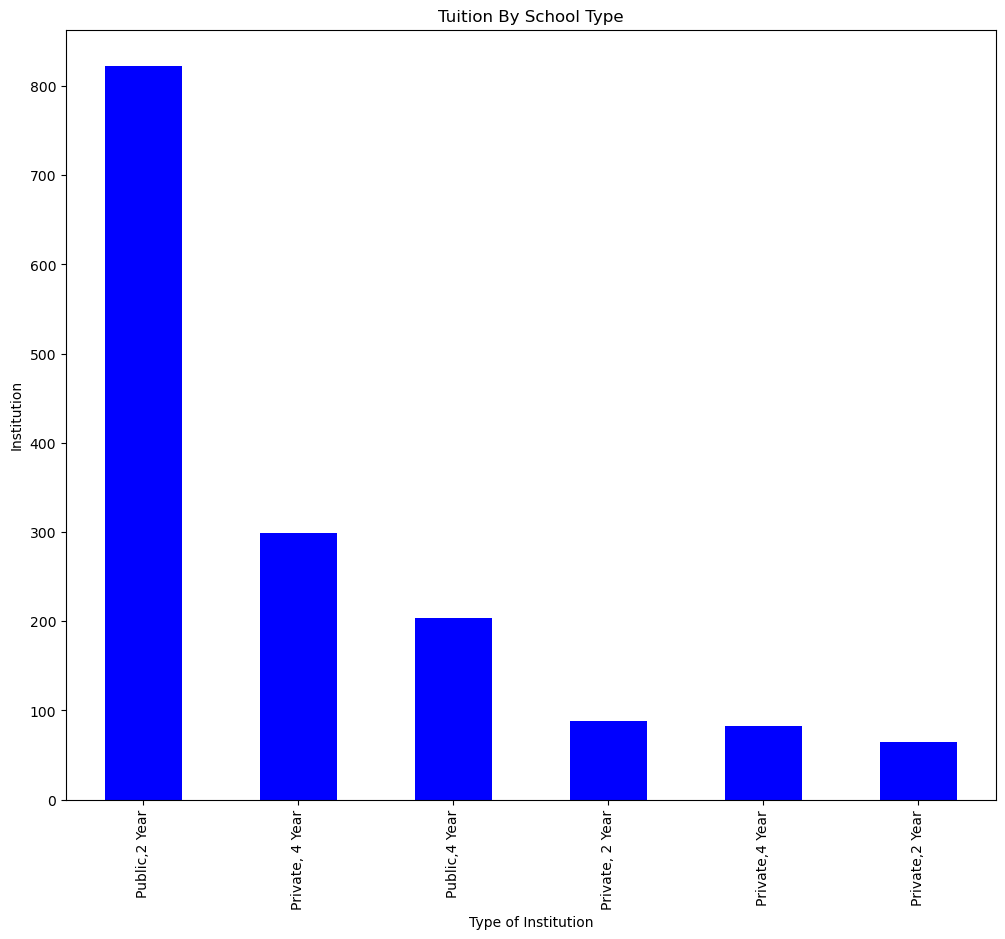

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
school_levels_plot = school_levels_df.groupby("Type of Institution")

pandas_bar_comb_info = school_levels_plot["Institution"].count().sort_values(ascending = False)
pandas_bar_comb = pandas_bar_comb_info.plot(kind = "bar", color = "blue", figsize = (12,10))
pandas_bar_comb.set_title("Tuition By School Type")
pandas_bar_comb.set_xlabel("Type of Institution")
pandas_bar_comb.set_ylabel("Institution")
plt.show()

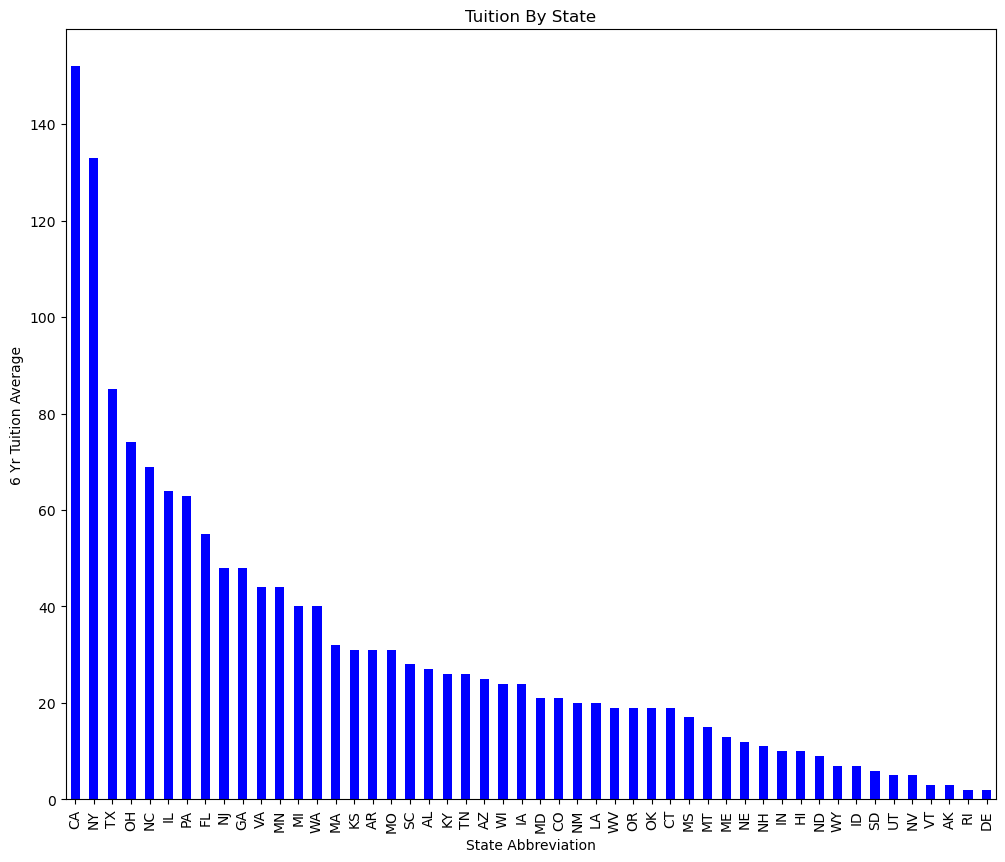

In [31]:
# Generate a bar plot showing the Tuition by State using Pandas.
state_data = tuition_df.groupby("State abbreviation")

pandas_bar_comb_info = state_data['6 Yr Tuition Mean'].count().sort_values(ascending = False)
pandas_bar_comb = pandas_bar_comb_info.plot(kind = "bar", color = "blue", figsize = (12,10))
pandas_bar_comb.set_title("Tuition By State")
pandas_bar_comb.set_xlabel("State Abbreviation")
pandas_bar_comb.set_ylabel("6 Yr Tuition Average")
plt.show()

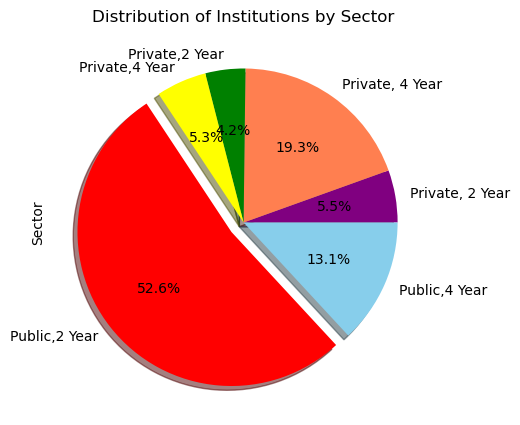

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
institution_sector_data = tuition_df.groupby("Type of Institution")

# Tells matplotlib to separate the "4 Year" section from the others
explode = (0, 0, 0, 0, 0.1, 0)

pandas_pie_comb = institution_sector_data["Institution"].nunique()
pandas_pie_chart = pandas_pie_comb.plot(kind = "pie", y = pandas_pie_comb, explode=explode, colors = {"skyblue", "purple", "yellow", "red", "green", "coral"}, autopct="%1.1f%%", shadow=True, figsize = (8,5))
pandas_pie_chart.set_title("Distribution of Institutions by Sector")
pandas_pie_chart.set_ylabel("Sector")
plt.show()

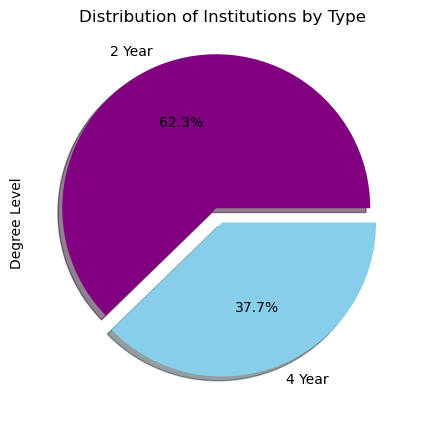

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
institution_type_data = tuition_df.groupby("Degree Level")

# Tells matplotlib to separate the "4 Year" section from the others
explode = (0.1, 0)

pandas_pie_comb = institution_type_data["Institution"].nunique()
pandas_pie_chart = pandas_pie_comb.plot(kind = "pie", y = pandas_pie_comb, explode=explode, colors = {"skyblue", "purple"}, autopct="%1.1f%%", shadow=True, figsize = (8,5))
pandas_pie_chart.set_title("Distribution of Institutions by Type")
pandas_pie_chart.set_ylabel("Degree Level")
plt.show()